**RNN LSTM BiLSTM**

In [ ]:
!pip install BnPReprocessing
# !pip install bltk
# !pip install BnLemma

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1 . Initial and Fundamental Steps

### 1.1 Load data and packages

In [ ]:
import pandas as pd
import regex

In [ ]:
# df1 = pd.read_csv('/content/drive/My Drive/nlp/emotion/dataset/5743_data.csv')
# print("total {} data".format(len(df1)))
# df2 = pd.read_csv('fear.csv')
# df1.head(10) # to randomly pickup some data

In [ ]:
# df1 = pd.read_csv('5743_data.csv')
# df2 = pd.read_csv('fear.csv')
# df3 = pd.read_csv('surprise.csv')
# df4 = pd.read_csv('anger.csv')
# df5 = pd.read_csv('joy.csv')
# df6 = pd.read_csv('sadness.csv')
# df7 = pd.read_csv('disgust_own.csv')
# df8 = pd.read_csv('5_surprise.csv')
# df9 = pd.read_csv('5_disgust.csv')
# df10 = pd.read_csv('6_disgust.csv')
# df11 = pd.read_csv('6_fear.csv')
# df12 = pd.read_csv('6_anger.csv')
# df13 = pd.read_csv('6_sadness.csv')


# df = pd.concat([df1, df2, df3, df4, df5, df6,df7,df7],ignore_index=True)
# df

In [ ]:
df = pd.read_csv('25kdata.csv')
df

,TEXT,classes
0,benson এ একটা জোস জিনিশ বার করল! benson fine c...,joy
1,ভাই রে ভাই....কিরণ দত্ত একটা চিজ....ভালোবাসা ভাই।,joy
2,"দাদা তোমাকে খুব ভালোবাসি, সবসময় তোমার ভিডিও দে...",joy
3,ওভাই....কোন অঞ্চলের বাংলা ভাষা ?? না মানে ...,joy
4,তোরে কে আঘাত দিয়েই আসলেই রিসেন্টলি আঘাত পাইসো...,joy
...,...,...
29841,সেই অদ্ভুত মুহূর্তটি যখন আপনি সেন্সর পূর্ণ একট...,surprise
29842,Vanavond surprise afmaken pfoe wát een we...,surprise
29843,জিএম ইয়াল মাত্র আমার টা খাবারের জন্য ঘু...,surprise
29844,ভাল কাজ অ্যানি স্পায়ার রেবেকাস্পেন্স এ...,surprise


### 1.2 Checking corresponding rows for Nan values

In [ ]:
df[df.isna().any(axis=1)]

,TEXT,classes
8623,NaN,surprise
11333,NaN,anger
11334,NaN,anger


### 1.3 As only one row with NaN , dropping it

In [ ]:
df = df.dropna()
print("total {} data".format(len(df)))

total 29843 data


In [ ]:
df.classes.value_counts()

joy         7903
sadness     6987
surprise    5293
anger       3468
disgust     3159
fear        3033
Name: classes, dtype: int64

In [ ]:
#merging all anger and disgust
# df['classes'] = df['classes'].apply(lambda x: 'anger' if x=='disgust' else x)

In [ ]:

# #merging all surprise and fear
# df['classes'] = df['classes'].apply(lambda x: 'surprise' if x=='fear' else x)
df['classes'] = df['classes'].apply(lambda x: 'negative' if x=='sadness' else x)
df['classes'] = df['classes'].apply(lambda x: 'positive' if x=='joy' else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# df = df[(df['classes'] == 'joy') | (df['classes'] == 'sadness') | (df['classes'] == 'anger')]
df = df[(df['classes'] == 'positive') | (df['classes'] == 'negative')]
df

,TEXT,classes
0,benson এ একটা জোস জিনিশ বার করল! benson fine c...,positive
1,ভাই রে ভাই....কিরণ দত্ত একটা চিজ....ভালোবাসা ভাই।,positive
2,"দাদা তোমাকে খুব ভালোবাসি, সবসময় তোমার ভিডিও দে...",positive
3,ওভাই....কোন অঞ্চলের বাংলা ভাষা ?? না মানে ...,positive
4,তোরে কে আঘাত দিয়েই আসলেই রিসেন্টলি আঘাত পাইসো...,positive
...,...,...
23888,আমি নিজেকে অসহায় বোধ করছি আমি আপনার অসুস্থতার...,negative
23889,আমি অনুমান করি যে এ সমস্ত কিছুই নির্বিঘ্নে প্র...,negative
23890,আমি না বললে মিথ্যা বলার জন্য আমি করুণাময় বোধ করি,negative
23891,আমি সাহায্য করতে পারি না তবে আমাদের এখানে আঁকা...,negative


In [ ]:
# df.classes.value_counts()

In [ ]:
# df = df.groupby('classes').apply(lambda x: x.sample(2295))
# df.classes.value_counts()

### 1.4 Maping the classes to integer(standerd procedure)

In [ ]:
map_class = dict(zip(df.classes.astype("category").cat.codes, df.classes))
print(map_class)

{1: 'positive', 0: 'negative'}


In [ ]:
df.classes = df.classes.astype("category").cat.codes
df.sample(10)

,TEXT,classes
14312,আমি একটি স্বপ্ন রেকর্ড করার সময় একটি সন্তুষ্ট...,1
21249,ive প্রমাণিত হয়েছে যে আমি যখন কোনও সাধারণ ভুল...,0
12708,আমার মনে আছে যখন ইউকেতে দাতব্য অনুদানের জন্য এ...,1
18107,আমি এতটাই নিরুৎসাহিত হয়ে পড়ছিলাম যে আমরা এই ...,0
18692,আমি সত্যিই এটি কাটতে গিয়েছিলাম এটি আমার দুর্ভ...,0
4949,সাম্প্রতিক সময়ে মেসির পারফরম্যান্স আর তাঁর শরী...,0
21876,আমি বন্ধনগুলি আঁকতে শুরু করেছি এবং এটি কীভাবে ...,0
17658,আমি আবহাওয়ার এই মাস্টারপিসকে আমার সম্পূর্ণ মন...,1
2736,তার বাবা সেদিন আমাকে জড়িয়ে কাঁদলেন অনেকক্ষন । ...,0
14640,আমি সুদর্শন q অনুভব করছি ওহ থেকে এই গানের কথাট...,1


# 2 . PreProcessing

In [ ]:
import BnPreprocessing as pp
df['TEXT'] = df['TEXT'].apply(lambda x: pp.remove_punc(str(x)))
df['TEXT'] = df['TEXT'].apply(lambda x: pp.remove_nonBangla(str(x)))
df['TEXT'] = df['TEXT'].apply(lambda x: pp.remove_digits(str(x)))
df['TEXT'] = df['TEXT'].apply(lambda x: pp.remove_emoticons(str(x)))

# df['TEXT'] = df['TEXT'].apply(pp.remove_sw)
df.head(10)

,TEXT,classes
0,এ একটা জোস জিনিশ বার করল এর মাঝামাঝি...,1
1,ভাই রে ভাই কিরণ দত্ত একটা চিজ ভালোবাসা ভাই,1
2,দাদা তোমাকে খুব ভালোবাসি সবসময় তোমার ভিডিও দে...,1
3,ওভাই কোন অঞ্চলের বাংলা ভাষা না মানে ...,1
4,তোরে কে আঘাত দিয়েই আসলেই রিসেন্টলি আঘাত পাইসো...,1
5,ডাকাত বলসে হাহা আমার ক্রাশ কে আম্মাজান কি ...,1
6,রাজা খুব দ্রুত মারা গেলেন তার সাদা আলখাল্লা র...,0
10,তার মুখ থেকেই শোনা যায় আলেকজান্ডার যখন বুকেফ্...,1
12,আজ আমি অনেক খুশি হ্যাপি অনেক কারন আজকে আমি জিতসি,1
13,দ্য স্যাক্রেড ব্যান্ড অফ থিবস জনের দুর্ধর...,0


In [ ]:
# def lemm(text):
#   import BnLemma as lm
#   bl = lm.Lemmatizer()
#   try:
#     return bl.lemma(text)
#   except:
#     return text
# df.TEXT = df.TEXT.apply(lemm)

0: 'anger', 

1: 'disgust', 

2: 'fear', 

3: 'joy', 

4: 'sadness', 

5: 'surprise'

In [ ]:
# len(df)-763+13
# df.loc[24950:24970]
# df[df.isna().any(axis=1)]

# 3 . Train Test Split

In [ ]:
# df['classes'] = df['classes'].apply(lambda x: str(x))

In [ ]:
# from collections import Counter
# Counter(y_train), Counter(y_test)

In [ ]:
from sklearn.model_selection import train_test_split

sentences = df['TEXT'].values
target = df['classes'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, target, test_size=0.2, random_state=1000)

from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer(text):
  return text.split()

# vectorizer = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(1,2), max_df = 0.06, min_df = 0.0006)
vectorizer = TfidfVectorizer(tokenizer = tokenizer, ngram_range=(1,1))
vectorizer = vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
X_train

<11912x21774 sparse matrix of type '<class 'numpy.float64'>'
	with 201678 stored elements in Compressed Sparse Row format>

In [ ]:
map_class

{0: 'negative', 1: 'positive'}

In [ ]:
def get_scores(y_test, y_pred):
  from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, y_pred)

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, y_pred,  average=None)

  # precision:  tp / (tp + fp)
  precision = precision_score(y_test, y_pred,  average=None)

  # recall:  tp / (tp + fn)
  recall = recall_score(y_test, y_pred,  average=None)

  return {
      'accuracy':accuracy,
      'f1':f1, 
      'precision':precision, 
      'recall':recall
  }

def get_score_table(y_test, y_pred, metrics=None, map_class=map_class):
    from prettytable import PrettyTable

    if metrics is None : metrics = ['f1', 'precision', 'recall', 'accuracy']
    dc= get_scores(y_test, y_pred)
    if 'accuracy' in metrics:
      print('Accuracy: {}'.format(dc['accuracy']))
      metrics.remove('accuracy')

    classes = list(set(df.classes.values))

    t = PrettyTable(['class']+metrics)
    for i in range(len(map_class)):
        t.add_row([map_class[i]]+[dc[d][i] for d in metrics])
    print(t)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
get_score_table(y_test, y_pred)

Accuracy: 0.8596373404969778
+----------+--------------------+--------------------+--------------------+
|  class   |         f1         |     precision      |       recall       |
+----------+--------------------+--------------------+--------------------+
| negative | 0.8490974729241877 | 0.8691796008869179 | 0.8299223712067749 |
| positive | 0.8688010043942247 | 0.8516923076923076 | 0.8866111467008329 |
+----------+--------------------+--------------------+--------------------+


In [ ]:
get_scores(y_test, y_pred)

{'accuracy': 0.8596373404969778,
 'f1': array([0.84909747, 0.868801  ]),
 'precision': array([0.8691796 , 0.85169231]),
 'recall': array([0.82992237, 0.88661115])}

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

get_score_table(y_test, y_pred)

Accuracy: 0.7935729847494554


IndexError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train.toarray(), y_train)
y_pred = classifier.predict(X_test.toarray())

get_score_table(y_test, y_pred)

Accuracy: 0.7260348583877996


IndexError: ignored

# 6 . DNN Approach

### 6.1 Defining necessary functions

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(14686, 3)

In [ ]:
sentences_train

array(['আমি অবশ্যই ঘৃণা বোধ করছি',
       'আমি তাদের উপযুক্ত হতে চাই বিশেষত যখন আমি ব্যঙ্গাত্মক ক্রোন অনুভব করছি',
       'আমি করুণ অনুভব করছি যেন আমার কোনও অর্থ নেই', ...,
       'আমি বাদামি স্টাফের বিরুদ্ধে জয়কে দ্বিগুণ করেছি আমরা রবিবার সত্যিই আশাবাদী বোধ করে ফিরে এসেছি এবং আরও দুর্দান্ত টেনিস দিয়ে ভরা অন্য এক দিনের প্রত্যাশায় রয়েছি',
       'আমি সত্যিই লোভী বোধ করি তবে আমি তাকে জড়িয়ে ধরতে পছন্দ করি',
       'আমি অনুভব করি যে অনুদানটি বাতিল হয়ে গেছে'], dtype=object)

In [ ]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
import tensorflow 
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 20000
embedding_dim = 35
max_length = 20
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

### 6.3 Design The layers and Fit the mdoel

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'অনুভব': 10,
 'আমার': 5,
 'আমি': 2,
 'এবং': 3,
 'করি': 4,
 'না': 8,
 'বোধ': 6,
 'মনে': 9,
 'যে': 7}

In [ ]:
len(word_index)

21776

In [ ]:
train_sequences = tokenizer.texts_to_sequences(sentences_train)
print(train_sequences[10])

[4800, 717, 12, 5, 84, 161]


In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

34
20
18
20
6
20


In [ ]:
print(train_padded[10])

[4800  717   12    5   84  161    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(sentences_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# label_tokenizer = Tokenizer()
# label_tokenizer.fit_on_texts(df['classes'])
# training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
# validation_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(sentences_train[10])

নিয়মের সন্ধান করতে আমার খারাপ লাগছে ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
নিয়মের সন্ধান করতে আমার খারাপ লাগছে


In [ ]:
# model = tf.keras.Sequential([
#     # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
#     tf.keras.layers.Embedding(vocab_size, embedding_dim),
#     # tf.keras.layers.Conv1D(32, 5, activation='relu'),
#     # tf.keras.layers.MaxPooling1D(),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
# #    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     # use ReLU in place of tanh function since they are very good alternatives of each other.
#     tf.keras.layers.Dense(32, activation='relu'),
#     # Add a Dense layer with 6 units and softmax activation.
#     # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
#     tf.keras.layers.Dense(6, activation='softmax')
# ])
# model.summary()

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim))
# model.add(layers.Conv1D(32, 5, activation='relu'))
# model.add(layers.MaxPooling1D())
# model.add(layers.Dropout(0.3))
model.add(layers.Bidirectional(layers.LSTM(embedding_dim)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='logcosh', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 35)          700000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 70)                19880     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2272      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 722,218
Trainable params: 722,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 15
batch_size = 30
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, y_test),
                    # batch_size=batch_size,
                    verbose=True)

Epoch 1/15
373/373 [==============================] - 5s 15ms/step - loss: 0.0812 - accuracy: 0.7295 - val_loss: 0.0587 - val_accuracy: 0.8220
Epoch 2/15
373/373 [==============================] - 6s 15ms/step - loss: 0.0389 - accuracy: 0.8870 - val_loss: 0.0503 - val_accuracy: 0.8455
Epoch 3/15
373/373 [==============================] - 6s 15ms/step - loss: 0.0284 - accuracy: 0.9182 - val_loss: 0.0526 - val_accuracy: 0.8472
Epoch 4/15
373/373 [==============================] - 6s 15ms/step - loss: 0.0234 - accuracy: 0.9347 - val_loss: 0.0551 - val_accuracy: 0.8381
Epoch 5/15
373/373 [==============================] - 6s 16ms/step - loss: 0.0196 - accuracy: 0.9456 - val_loss: 0.0519 - val_accuracy: 0.8482
Epoch 6/15
373/373 [==============================] - 6s 16ms/step - loss: 0.0173 - accuracy: 0.9507 - val_loss: 0.0535 - val_accuracy: 0.8482
Epoch 7/15
373/373 [==============================] - 6s 15ms/step - loss: 0.0152 - accuracy: 0.9588 - val_loss: 0.0560 - val_accuracy: 0.8486

### 6.4 Evaluation metrics with plotting

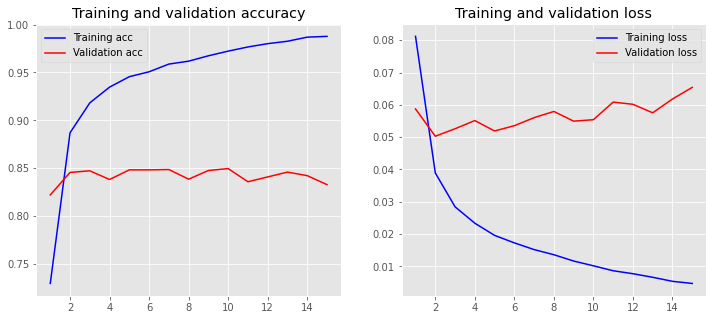

In [ ]:
plot_history(history.history)

# Attention

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

import tensorflow as tf
from keras_preprocessing import sequence
# from tensorflow import keras
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Concatenate

sequence_input = tf.keras.Input(shape=(max_length,), dtype='int32')
embedded_sequences = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)(sequence_input)
tdist = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100,activation='relu'))(embedded_sequences)
lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM
                                     (embedding_dim,
                                      dropout=0.2,
                                      return_sequences=True,
                                      return_state=True,
                                      recurrent_activation='relu',
                                      recurrent_initializer='glorot_uniform'), name="bi_lstm_0")(tdist)

lstm, forward_h, forward_c, backward_h, backward_c = tf.keras.layers.Bidirectional \
    (tf.keras.layers.LSTM
     (embedding_dim,
      dropout=0.2,
      return_sequences=True,
      return_state=True,
      recurrent_activation='relu',
      recurrent_initializer='glorot_uniform'))(lstm)

state_h = tf.keras.layers.Concatenate()([forward_h, backward_h])
state_c = tf.keras.layers.Concatenate()([forward_c, backward_c])
attention = Attention(35)
context_vector, attention_weights = attention(lstm, state_h)
fmod = tf.keras.layers.Flatten()(context_vector)
output = tf.keras.layers.Dense(2, activation='softmax')(fmod)

model = tf.keras.Model(inputs=sequence_input, outputs=output)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 20, 35)       700000      input_2[0][0]                    
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 20, 100)      3600        embedding_6[0][0]                
__________________________________________________________________________________________________
bi_lstm_0 (Bidirectional)       [(None, 20, 70), (No 38080       time_distributed_1[0][0]         
_______________________________________________________________________________________

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        min_delta=0,
                                                        patience=1,
                                                        verbose=0, mode='auto')

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

name = "24946_72.47"
# model.load_weights("/content/drive/My Drive/nlp/emotion/weights/24946_72.47/"+name+".weights")
model.compile(loss='logcosh', 
              optimizer=opt, 
              metrics=['accuracy'])                                            

In [ ]:
num_epochs = 15
batch_size = 30
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, y_test),
                    # batch_size=batch_size,
                    verbose=True,
                    # callbacks=[early_stopping_callback]
                    )

Epoch 1/15
373/373 [==============================] - 47s 125ms/step - loss: 0.0936 - accuracy: 0.6580 - val_loss: 0.0545 - val_accuracy: 0.8308
Epoch 2/15
373/373 [==============================] - 46s 122ms/step - loss: 0.0354 - accuracy: 0.8969 - val_loss: 0.0487 - val_accuracy: 0.8563
Epoch 3/15
373/373 [==============================] - 45s 121ms/step - loss: 0.0183 - accuracy: 0.9514 - val_loss: 0.0513 - val_accuracy: 0.8506
Epoch 4/15
373/373 [==============================] - 45s 120ms/step - loss: 0.0123 - accuracy: 0.9685 - val_loss: 0.0620 - val_accuracy: 0.8402
Epoch 5/15
373/373 [==============================] - 45s 121ms/step - loss: 0.0101 - accuracy: 0.9736 - val_loss: 0.0587 - val_accuracy: 0.8412
Epoch 6/15
373/373 [==============================] - 45s 121ms/step - loss: 0.0079 - accuracy: 0.9803 - val_loss: 0.0599 - val_accuracy: 0.8385
Epoch 7/15
373/373 [==============================] - 44s 119ms/step - loss: 0.0071 - accuracy: 0.9821 - val_loss: 0.0601 - val_ac

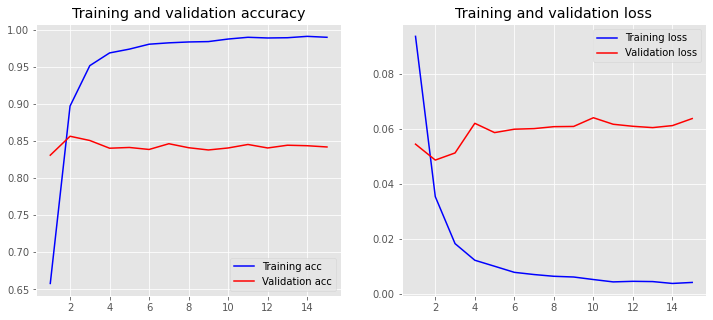

In [ ]:
plot_history(history.history)

# Hierarchicl Attention

In [ ]:
import os
import re

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from keras import backend as K
from keras.models import Model
from keras import initializers
from keras.engine.topology import Layer
from keras.layers import Dense, Input
from keras.layers import Embedding, GRU, Bidirectional, TimeDistributed
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils.np_utils import to_categorical
from nltk import tokenize

class HierarchicalAttentionNetwork(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(HierarchicalAttentionNetwork, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim,)))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self.trainable_weights = [self.W, self.b, self.u]
        super(HierarchicalAttentionNetwork, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))

        ait = K.exp(K.squeeze(K.dot(uit, self.u), -1))

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        weighted_input = x * K.expand_dims(ait)
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [ ]:
max_sentences = 12
embedding_layer = Embedding(vocab_size, embedding_dim,
                            input_length=max_length)

sentence_input = Input(shape=(max_length,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
lstm_word = Bidirectional(GRU(50, return_sequences=True))(embedded_sequences)
attn_word = HierarchicalAttentionNetwork(100)(lstm_word)
sentenceEncoder = Model(sentence_input, attn_word)

review_input = Input(shape=(max_sentences, max_length), dtype='int32')
review_encoder = TimeDistributed(sentenceEncoder)(review_input)
lstm_sentence = Bidirectional(GRU(50, return_sequences=True))(review_encoder)
attn_sentence = HierarchicalAttentionNetwork(100)(lstm_sentence)
preds = Dense(2, activation='softmax')(attn_sentence)
model = Model(review_input, preds)
model.summary()

tracking <tf.Variable 'hierarchical_attention_network_9/Variable:0' shape=(100, 100) dtype=float32> W
tracking <tf.Variable 'hierarchical_attention_network_9/Variable:0' shape=(100,) dtype=float32> b
tracking <tf.Variable 'hierarchical_attention_network_9/Variable:0' shape=(100, 1) dtype=float32> u
tracking <tf.Variable 'hierarchical_attention_network_10/Variable:0' shape=(100, 100) dtype=float32> W
tracking <tf.Variable 'hierarchical_attention_network_10/Variable:0' shape=(100,) dtype=float32> b
tracking <tf.Variable 'hierarchical_attention_network_10/Variable:0' shape=(100, 1) dtype=float32> u
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 12, 20)            0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 12, 100)           736000    
__________________________________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])    
num_epochs = 15
batch_size = 30
print("model fitting - Hierachical attention network")
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, y_test),
                    # batch_size=batch_size,
                    verbose=True,
                    # callbacks=[early_stopping_callback]
                    )

In [ ]:
train_padded.reshape()

(21201, 20)

In [ ]:
train_padded

array([[   2,   38,  324, ...,    0,    0,    0],
       [   2,  195,    3, ...,  302,   19,    0],
       [ 608,    5,  977, ...,  147, 3667, 1432],
       ...,
       [   2,  573,    4, ...,    0,    0,    0],
       [ 258,    7,  245, ...,    0,    0,    0],
       [  39,   48,  189, ...,  661,  189,    0]], dtype=int32)

In [ ]:
np.reshape(train_padded, (train_padded.shape[0], 9, train_padded.shape[1]))

ValueError: ignored

In [ ]:
num_epochs = 15
batch_size = 30
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, y_test),
                    # batch_size=batch_size,
                    verbose=True,
                    # callbacks=[early_stopping_callback]
                    )

RuntimeError: ignored

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

class AttentionLayer(Layer):
    """
    Hierarchial Attention Layer as described by Hierarchical Attention Networks for Document Classification(2016)
    - Yang et. al.
    Source: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
    Theano backend
    """
    def __init__(self,attention_dim=100,return_coefficients=False,**kwargs):
        # Initializer 
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = tf.keras.initializers.get('glorot_uniform') # initializes values with uniform distribution
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        self.trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)
        
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)
        
        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait
        
        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

In [ ]:
MAX_SENTENCE_NUM = 9
embedding_layer = tf.keras.layers.Embedding(vocab_size,embedding_dim ,
                            input_length=max_length,name='word_embedding')

# Words level attention model
word_input = tf.keras.layers.Input(shape=(max_length,), dtype='int32',name='word_input')
word_sequences = embedding_layer(word_input)
word_gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(50, return_sequences=True),name='word_gru')(word_sequences)
word_dense = tf.keras.layers.Dense(100, activation='relu', name='word_dense')(word_gru) 
word_att,word_coeffs = AttentionLayer(embedding_dim)(word_dense)
wordEncoder = tf.keras.Model(inputs = word_input,outputs = word_att)

# Sentence level attention model
sent_input = tf.keras.layers.Input(shape=(MAX_SENTENCE_NUM,max_length), dtype='int32',name='sent_input')
sent_encoder = tf.keras.layers.TimeDistributed(wordEncoder,name='sent_linking')(sent_input)
sent_gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(50, return_sequences=True),name='sent_gru')(sent_encoder)
sent_dense = tf.keras.layers.Dense(100, activation='relu', name='sent_dense')(sent_gru) 
sent_att,sent_coeffs = AttentionLayer(embedding_dim)(sent_dense)
sent_drop = tf.keras.layers.Dropout(0.5,name='sent_dropout')(sent_att)
preds = tf.keras.layers.Dense(5, activation='softmax',name='output')(sent_drop)

# Model compile
model = tf.keras.Model(sent_input, preds)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
print(wordEncoder.summary())
print(model.summary())

AttributeError: ignored

In [ ]:
name = "28503_71.44"
!mkdir "/content/drive/My Drive/nlp/emotion/weights/28503_70.44/"
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/nlp/emotion/weights/"+name+"/"+name+".weights")
print("Saved model to disk")

import pickle
with open("/content/drive/My Drive/nlp/emotion/weights/"+name+"/"+name+".hist", 'wb') as file_pi:
   pickle.dump(history.history, file_pi)

mkdir: cannot create directory ‘/content/drive/My Drive/nlp/emotion/weights/28503_70.44/’: File exists
Saved model to disk


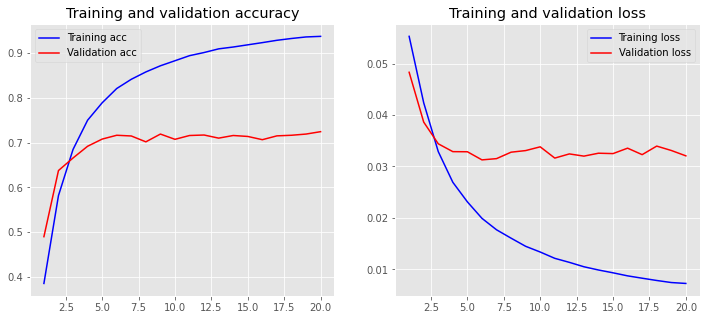

In [ ]:
with open("/content/drive/My Drive/nlp/emotion/weights/"+name+".hist", 'rb') as p:
  hist = pickle.load(p)
plot_history(hist)

In [ ]:
model.save_weights('modjbjkjkel')

# CNN

In [ ]:
RANDOM_STATE = 42
# Split train & test
sentences = df['TEXT'].values
target = df['classes'].values
text_train, text_test, y_train, y_test = train_test_split(sentences, target,  test_size=0.15, random_state=RANDOM_STATE)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Tokenize and transform to integer index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = max(len(x) for x in X_train) # longest text in train set

# Add pading to ensure all vectors have same dimensionality
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

26563

In [ ]:
embedding_dim = 30

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Embedding(vocab_size, embedding_dim, 
#                            weights=[embedding_matrix], 
#                            input_length=maxlen, 
#                            trainable=False))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D())
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D())
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='logcosh', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 213, 30)           796890    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 209, 32)           4832      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 104, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 100, 32)           5152      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 96, 128)           20608     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 48, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6144)             

In [ ]:
# Fit model
batch_size = 10
history = model.fit(X_train, y_train,
                    epochs=11,
                    # steps_per_epoch=int(len(X_train)/batch_size),
                    verbose=True,
                    validation_data=(X_test, y_test),
                    # validation_steps=int(len(X_test)/batch_size)
                    batch_size=batch_size
                    )

Epoch 1/11
1561/1561 [==============================] - 16s 10ms/step - loss: 0.0787 - accuracy: 0.6013 - val_loss: 0.0575 - val_accuracy: 0.7182
Epoch 2/11
1561/1561 [==============================] - 32s 20ms/step - loss: 0.0459 - accuracy: 0.7884 - val_loss: 0.0544 - val_accuracy: 0.7444
Epoch 3/11
1561/1561 [==============================] - 26s 17ms/step - loss: 0.0294 - accuracy: 0.8744 - val_loss: 0.0559 - val_accuracy: 0.7487
Epoch 4/11
1561/1561 [==============================] - 26s 17ms/step - loss: 0.0180 - accuracy: 0.9256 - val_loss: 0.0540 - val_accuracy: 0.7687
Epoch 5/11
1561/1561 [==============================] - 32s 21ms/step - loss: 0.0126 - accuracy: 0.9492 - val_loss: 0.0567 - val_accuracy: 0.7629
Epoch 6/11
1561/1561 [==============================] - 32s 21ms/step - loss: 0.0101 - accuracy: 0.9596 - val_loss: 0.0610 - val_accuracy: 0.7549
Epoch 7/11
1561/1561 [==============================] - 32s 20ms/step - loss: 0.0083 - accuracy: 0.9678 - val_loss: 0.0550 -

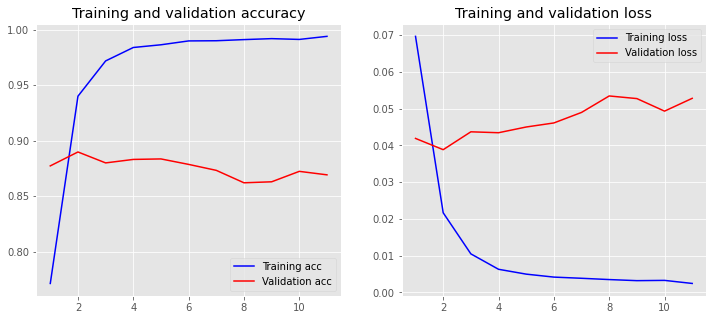

In [ ]:
plot_history(history.history)

# Pretrained

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec.load("/content/drive/My Drive/nlp/emotion/word2vec/bengali_word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
import numpy as np

def create_embedding_matrix(model, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

   
    for word in word_index:
        if word in model.wv.vocab:
            idx = word_index[word] 
            embedding_matrix[idx] = np.array(
                vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
# /content/drive/My Drive/nlp/emotion/word2vec/bengali_word2vec.model

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(model,
                                          tokenizer.word_index, 
                                          embedding_dim)

AttributeError: ignored

In [ ]:
embedding_matrix.shape

(33516, 50)

In [ ]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

1.2032

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 213, 300)          10054800  
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 10,057,876
Trainable params: 3,076
Non-trainable params: 10,054,800
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


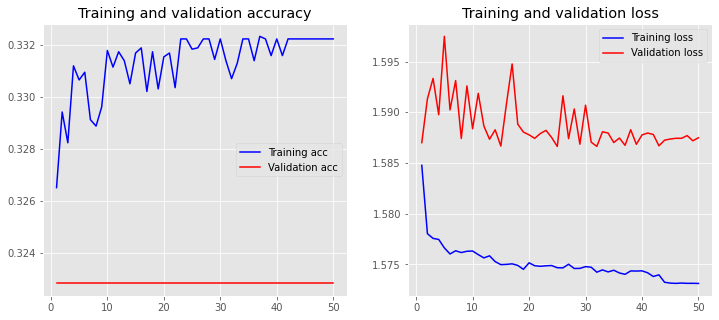

In [ ]:
plot_history(history)